In [17]:
import numpy as np
import matplotlib.pyplot as plt

import numpy.linalg as la
from sklearn.model_selection import train_test_split


[-0.13533528  0.22956396 -0.59542166]
[ 1.7046751  -0.82695198  0.58689828 -3.59613061 -3.01898511  3.00744569
  4.68261576 -1.86575822  1.92322616  3.76389152  3.94606664 -4.14955789
 -4.60945217 -3.3016958   3.78142503 -4.01653166 -0.78892375  4.5788953
  0.33165285  1.91877114 -1.84484369  1.86500928  3.34625672 -4.81711723
  2.50144315  4.88861089  2.48165654 -2.19556008  2.89279328 -3.96773993
 -0.52106474  4.08595503 -2.06385852 -2.12224661 -3.69971428 -4.80633042
  1.78835533 -2.88371884 -2.34453341 -0.08426841 -4.46637455  0.74117605
 -3.53271425  0.89305537  1.9975836  -3.97665571 -0.85944012  1.94400158
 -0.8582073  -4.50046541  0.35896406  1.63794645  0.14889112  4.44594756
  0.86555041  4.03401915 -3.62525296 -3.60723653  3.07391289 -1.02323163]
[ 9.41386470e-01  4.42721728e-01  1.44761653e-01 -8.32103694e-02
  5.93955584e-01  6.01647764e-01 -2.05534036e-03 -9.04533185e-01
  3.52464118e-01 -1.89284551e-01 -3.78476201e-02 -8.84784242e-02
  1.11988714e-02  2.50080089e-01 -1.7

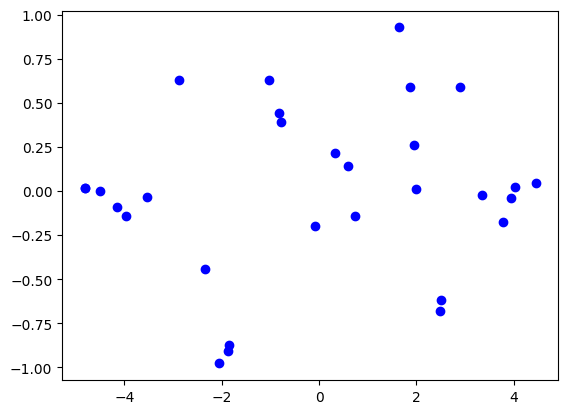

In [18]:
n_samples = 60
x_scale = 5
def sample_x(n_samples, x_scale):
    """
    input:
        parameters n_samples, x_scale
    output:
        samples of x 
    details:
        np.random.rand : sample a uniform distribution over [0, 1)
        trans uniform distribution from  [0, 1] to [-x_scale, +x_scale]
    """   
    return (np.random.rand(n_samples)-0.5)*2*x_scale

def make_true_y(x):
    """
    input:
        x
    output:
        y
    details:
        make true y by a designed function
    """
    #np.cos(np.pi*x)
    return np.exp(-0.5*(x-2)**2)*np.sin(1.5*np.pi*x) - np.exp(-0.5*(x+2)**2)*np.cos(np.pi*x)

X = sample_x(n_samples, x_scale)
y = make_true_y(X)
print(make_true_y(np.array([0, 0.5, 1])))
print (X)
print(y)
#plt.plot(X, y, 'bo')
print(type(X))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42) # setting 'random_state' makes sampling unchanged
print(type(X_train))
plt.plot(X_train, y_train, 'bo')


--------------------------------------------------
p:  1
x_train:  (30,)  y_train:  (30,)
x_test:  (30,)  y_test:  (30,)
norm_eq_theta:  [-0.01181964  0.02032207] (2,)
loss_train:  0.21414982789153417
loss_test:  0.172780759199381
--------------------------------------------------
p:  2
x_train:  (30,)  y_train:  (30,)
x_test:  (30,)  y_test:  (30,)
norm_eq_theta:  [ 0.00522072  0.01919501 -0.00204071] (3,)
loss_train:  0.21393404938359228
loss_test:  0.17177965981195117
--------------------------------------------------
p:  3
x_train:  (30,)  y_train:  (30,)
x_test:  (30,)  y_test:  (30,)
norm_eq_theta:  [ 0.02316729  0.11676153 -0.00743962 -0.00678133] (4,)
loss_train:  0.1999656316553904
loss_test:  0.1622410992470244
--------------------------------------------------
p:  4
x_train:  (30,)  y_train:  (30,)
x_test:  (30,)  y_test:  (30,)
norm_eq_theta:  [ 0.11576481  0.1067088  -0.04572251 -0.00535179  0.00188765] (5,)
loss_train:  0.1946404418009223
loss_test:  0.1709727130967583
--

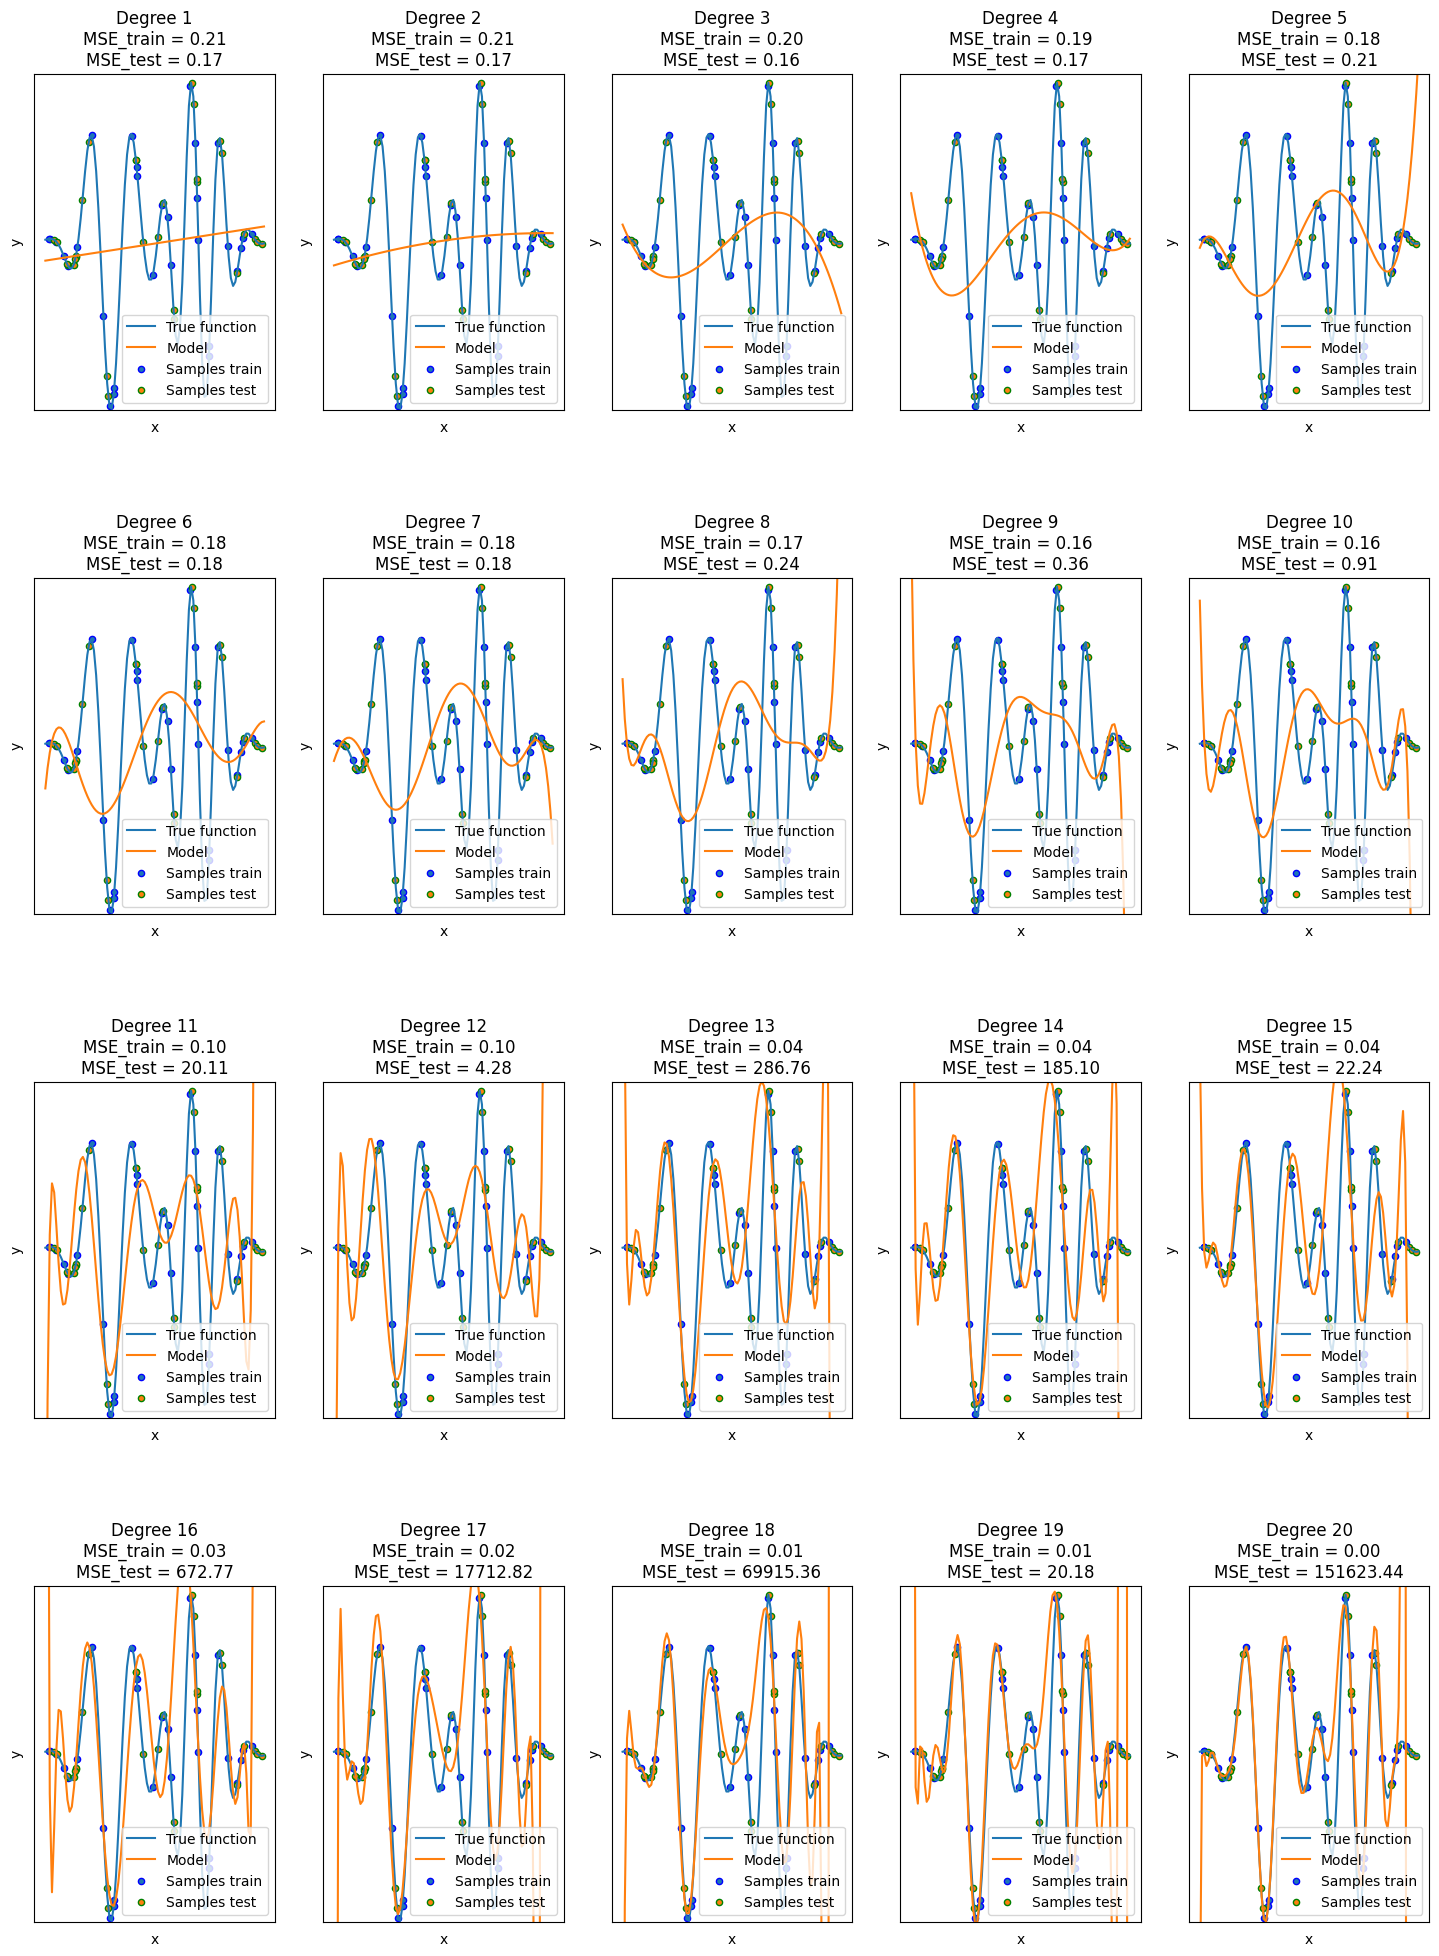

[0.172780759199381, 0.17177965981195117, 0.1622410992470244, 0.1709727130967583, 0.20673987803809685, 0.17557326218435299, 0.18415982659037447, 0.2365616975792269, 0.35668445308801433, 0.9131976932649464, 20.107620699648066, 4.282865978814151, 286.76127837439464, 185.10419525184025, 22.23681035908552, 672.7736641971005, 17712.818838818755, 69915.36446147684, 20.180234097588936, 151623.43854290698]
[0.21414982789153417, 0.21393404938359228, 0.1999656316553904, 0.1946404418009223, 0.1826198298111818, 0.17812415836296858, 0.17680014885056874, 0.1709801901800071, 0.15997002525791204, 0.1588556577356998, 0.10059579535334112, 0.09718291141998292, 0.03953457476748308, 0.03890981307876425, 0.037615270153730805, 0.0338186612265721, 0.018644375655663174, 0.01424482900226345, 0.008024614161926586, 0.0017011583023045778]


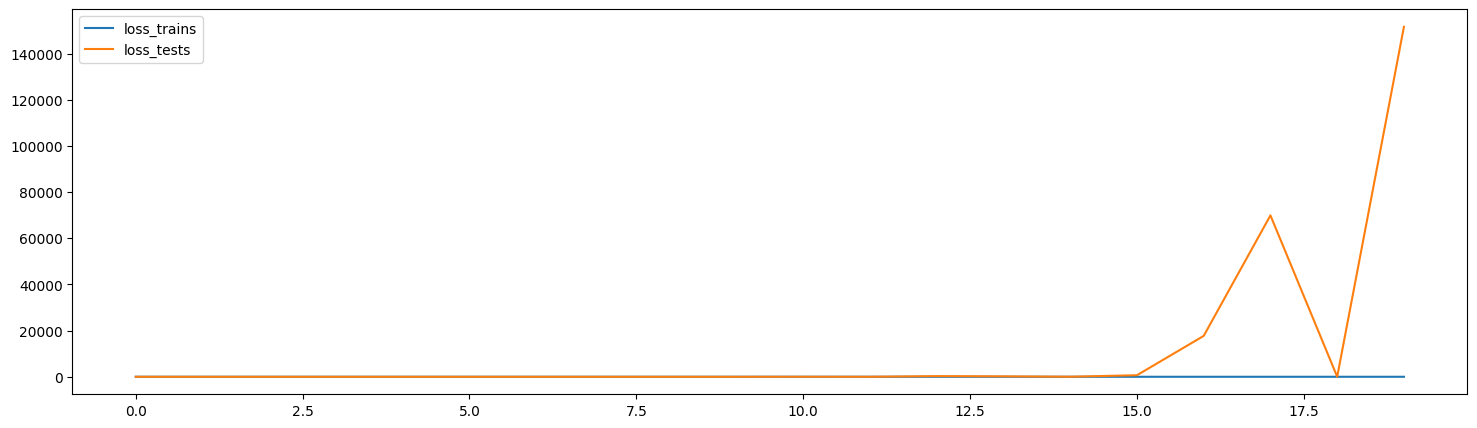

In [19]:
def polynomial_x(x, p):
    """ 
    polynomial of x
    """
    xs = []
    for i in range(p+1):
        xs.append(x**i)
    return np.array(xs).T

def linear_regression_x(x, theta):
    """
    linear regression of x
    """
    return np.dot(theta, x.T)

def linear_regression_normal_equation(x, y):
    """
    normal equation to get best linear regression
    """
    return np.dot(la.inv(np.dot(x.T, x)), np.dot(x.T, y))

def loss_func(y_true, y_pred):
    """
    MSE(mean squared erro)
    """
    return 1/len(y_true) * np.sum((y_true - y_pred) ** 2)

def run_regression(x_train, y_train, x_test, y_test, p):
    """
    run the process of regression
    """
    plt.figure(figsize=(18, int(p/5)*6))
    loss_trains , loss_tests = [], []
    for i in range(1, p+1):
        print("--------------------------------------------------")
        print("p: ", i)
        print("x_train: ", x_train.shape, " y_train: ", y_train.shape)
        print("x_test: ", x_test.shape, " y_test: ", y_test.shape)

        p_x_train = polynomial_x(x_train, i)
        p_x_test = polynomial_x(x_test, i)
        # make model
        norm_eq_theta = linear_regression_normal_equation(p_x_train, y_train)
        print("norm_eq_theta: ", norm_eq_theta, norm_eq_theta.shape)
        
        # predict
        lr_x_train = linear_regression_x(p_x_train, norm_eq_theta)
        lr_x_test = linear_regression_x(p_x_test, norm_eq_theta)
        
        loss_train = loss_func(y_train, lr_x_train)
        loss_test = loss_func(y_test, lr_x_test)
        loss_trains.append(loss_train)
        loss_tests.append(loss_test)

        
        print("loss_train: ", loss_train)
        print("loss_test: ", loss_test)

        # show time
       
        x_plot = np.linspace(-5, 5, 100)

        ax = plt.subplot(int(p/5), 5, i)
        plt.setp(ax, xticks=(), yticks=())

        plt.plot(x_plot, make_true_y(x_plot), label="True function")
        plt.plot(x_plot, linear_regression_x(polynomial_x(x_plot, i), norm_eq_theta), label="Model")
        plt.scatter(x_train, y_train, edgecolor="b", s=20, label="Samples train")
        plt.scatter(x_test, y_test, edgecolor="g", s=20, label="Samples test")
        plt.subplots_adjust(hspace=0.5)
        plt.xlabel("x")
        plt.ylabel("y")
        plt.ylim(-1,1)
        plt.legend(loc="best")
        plt.title(
            "Degree {}\nMSE_train = {:.2f}\nMSE_test = {:.2f}".format(
                i, loss_train, loss_test
            )
        )
    plt.show()
    print(loss_tests)
    print(loss_trains)
    plt.figure(figsize=(18, 5))
    plt.plot(loss_trains, label = "loss_trains")
    plt.plot(loss_tests, label = "loss_tests")
    plt.legend(loc="best")

run_regression(X_train, y_train, X_test, y_test, 20)

2.Classification

In [44]:
class multi_logistic_regression:
    def __init__(self, x, y, test_ratio, learning_rate, run_times):
        if test_ratio > 0:
            np.random.seed(3)
            self.x_train, self.x_test, self.y_train, self.y_test =\
                    train_test_split(x, y, test_size=test_ratio, random_state=7)
        else:
            self.x_train, self.x_test = x, x
            self.y_train, self.y_test =  y, y
        print("self.x_test: ", self.x_test.shape, "self.x_train: ", self.x_train.shape)
        print("self.y_train: ", self.y_train)
        print("self.y_test: ", self.y_test)
        self.n_class = max(self.y_train) + 1
        
        # init y
        self.y_train = self.one_hot(self.y_train)
        self.y_test = self.one_hot(self.y_test)
        print("self.y_test: ", self.y_test.shape, "self.y_train: ", self.y_train.shape)

        # init x
        self.x_test = self.add_bias(self.x_test)
        self.x_train = self.add_bias(self.x_train)
        print("self.x_test: ", self.x_test.shape, "self.x_train: ", self.x_train.shape)
        

        self.n_feas = self.x_train.shape[1]
        self.n_semples = self.x_train.shape[0]
        
        # init w
        np.random.seed(1)
        self.w = np.random.rand(self.n_feas, self.n_class)
        
        print("self.w: ", self.w.shape)
        print(self.w)
        print(np.dot(self.x_test, self.w).shape)
        print(self.x_train[0:3,:])
        print(self.y_train[0:3,:])

        self.alpha = learning_rate
        self.run_times = run_times


    def one_hot(self, s):
        res = np.eye(self.n_class)[s.reshape(-1)] 
        return res.reshape(list(s.shape)+[self.n_class])
    
    def add_bias(self, x):
        b = np.full((x.shape[0], 1), 1)
        res = np.concatenate((b, x), axis=1)
        return res
    
    def multi_lr(self, x, w):
        linear = np.dot(x, w)
     
        #large = np.max(linear, axis=1) # largest of the class scores for each data point (N-by-1)
        #large_offset = np.dot(np.diag(large), np.ones((x.shape[0], w.shape[1]))) #  (N-by-N)*(N-by-K) = (N-by-K)    

        exp = np.exp(linear) 
        denominator = np.sum(exp, axis = 1)
        print("denominator: ", denominator)
        denominator = denominator.reshape([exp.shape[0], 1])
        print("exp: ", exp, exp.shape)
        res =  exp / denominator
        print("multi_lr: ", res, res.shape)
        return res
    
    def update_w(self, w, x, y_pred, y_true, learning_ratio):
        delta = np.dot(x.T, (y_pred - y_true)) / len(x)
        return w - learning_ratio * delta
    
    def loss(self, y_pred, y_true):
        print("-y_true * np.log(y_pred): ", -y_true * np.log(y_pred))

      
        res = np.mean(-y_true * np.log(y_pred))
        print("loss: ", res)
       
        return res
    
    def run(self):
        n = self.run_times
        loss_trains, loss_tests = [], []
        while(n>0):
            y_pred_train = self.multi_lr(self.x_train, self.w)
            y_pred_test = self.multi_lr(self.x_test, self.w)
            loss_tests.append(self.loss(y_pred_test, self.y_test))
            loss_trains.append(self.loss(y_pred_train, self.y_train))
            print(self.w)
            print("--------------------------")
            self.w = self.update_w(self.w, self.x_train, y_pred_train, self.y_train, self.alpha)
            
            
            n -= 1

        print("loss_tests: ", loss_tests)
        print("loss_trains: ", loss_trains)
        plt.figure(figsize=(18, 5))
        plt.plot(loss_trains, label = "loss_trains")
        plt.plot(loss_tests, label = "loss_tests")
        plt.legend(loc="best")
#mlr = multi_logistic_regression(x, y, 0.33)
#mlr.run()

self.x_test:  (75, 4) self.x_train:  (75, 4)
self.y_train:  [2 1 0 1 0 2 2 1 0 0 1 2 0 2 2 1 0 1 0 2 2 0 0 2 1 2 2 1 0 0 2 0 0 1 2 2 1
 1 0 2 0 0 1 1 2 0 1 1 2 2 1 2 0 1 1 0 0 0 1 1 0 2 2 1 2 0 2 1 1 0 2 1 2 1
 0]
self.y_test:  [2 1 0 1 2 0 1 1 0 1 1 1 0 2 0 1 2 2 0 0 1 2 1 2 2 2 1 1 2 2 2 1 0 2 1 0 0
 0 0 2 2 1 2 2 1 0 1 1 2 0 0 0 2 0 2 1 1 1 0 0 0 1 2 1 1 0 2 0 0 2 2 0 2 0
 1]
self.y_test:  (75, 3) self.y_train:  (75, 3)
self.x_test:  (75, 5) self.x_train:  (75, 5)
self.w:  (5, 3)
[[4.17022005e-01 7.20324493e-01 1.14374817e-04]
 [3.02332573e-01 1.46755891e-01 9.23385948e-02]
 [1.86260211e-01 3.45560727e-01 3.96767474e-01]
 [5.38816734e-01 4.19194514e-01 6.85219500e-01]
 [2.04452250e-01 8.78117436e-01 2.73875932e-02]]
(75, 3)
[[1.  6.7 3.  5.2 2.3]
 [1.  6.1 3.  4.6 1.4]
 [1.  5.7 3.8 1.7 0.3]]
[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]
denominator:  [1792.19763225  740.26604473  117.37044056  985.18915448   62.8429259
 1463.26987081 4476.24588441  208.75688566   72.78931698  103.99875419
 

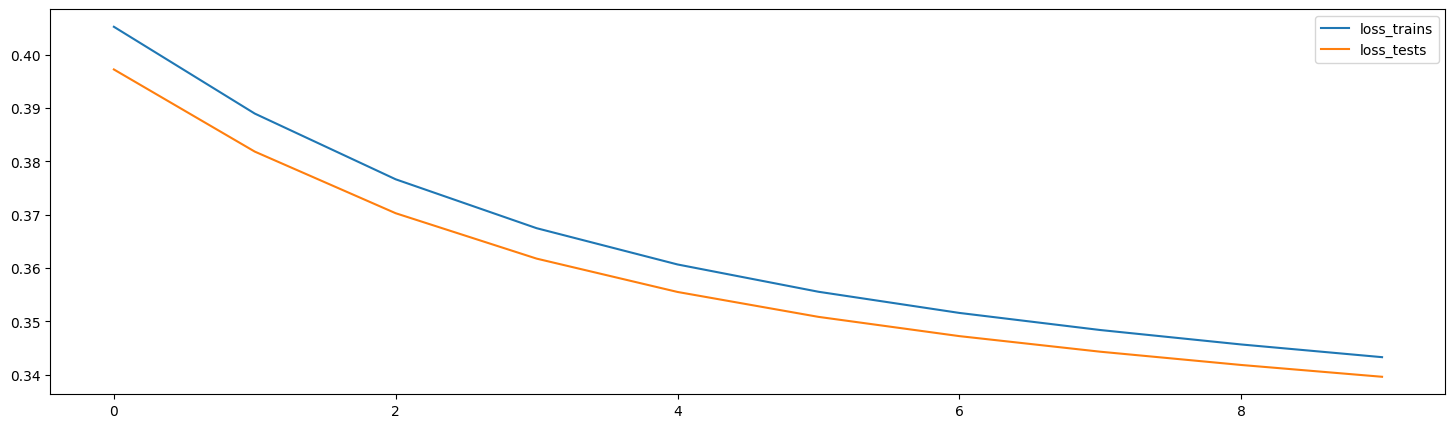

In [46]:
from sklearn.datasets import load_iris
iris = load_iris()
x = iris.data
y = iris.target
target_names = iris.target_names
mlr = multi_logistic_regression(x, y, test_ratio=0.5, learning_rate=0.01, run_times=10)
mlr.run()

In [ ]:
x = np.array([[0.52, 1.12,  0.77],
                    [3.82, -6.11, 3.15],
                   [0.88, -1.08, 0.15],
                   [0.52, 0.06, -1.30],
                   [0.74, -2.49, 1.39],
                   [0.14, -0.43, -1.69]])
y = np.array([0, 1, 3, 2, 1, 2])
print(x.shape, y.shape)
mlr = multi_logistic_regression(x, y, test_ratio=-1,learning_rate=0.75,run_times=100)
mlr.run()

[[4.17022005e-01 7.20324493e-01 1.14374817e-04 3.02332573e-01
  1.46755891e-01]
 [9.23385948e-02 1.86260211e-01 3.45560727e-01 3.96767474e-01
  5.38816734e-01]
 [4.19194514e-01 6.85219500e-01 2.04452250e-01 8.78117436e-01
  2.73875932e-02]]
Iteration number: 0, loss: 1.371
[[ 0.40828108  0.73326195 -0.04375587  0.28376089  0.14820474]
 [ 0.21461866  0.24184404  0.43484352  0.42403092  0.55949619]
 [ 0.30565537  0.61669822  0.15903971  0.86942567  0.0052593 ]]


ValueError: shapes (3,5) and (3,) not aligned: 5 (dim 1) != 3 (dim 0)

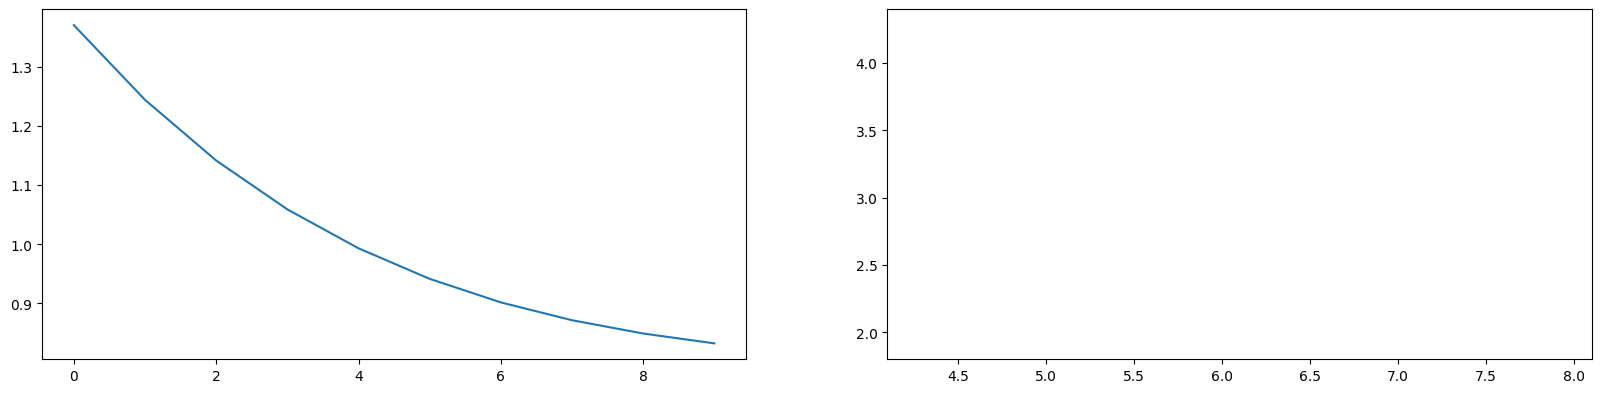

In [106]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.metrics import confusion_matrix
def softmax(x,theta):#softmax假设函数
    p=[]
    for i in range(len(x)):
            p.append(np.power(np.e,np.dot(theta,x[i]))/np.sum(np.power(np.e,np.dot(theta,x[i]))))
    return np.array(p)

def LR_predict(x,theta,c1):#预测函数
    return np.argmax(softmax(x,theta).reshape((-1,c1)),axis=1)
def loss_function(x,y,theta):#损失函数
    cross_entropy=0
    for i in range(y.shape[1]):
        cross_entropy=cross_entropy+np.dot(y[:,i],np.log(softmax(x,theta))[:,i])
    return -cross_entropy/len(x)
def partial_theta(x,theta,y):#求偏导
    return np.dot((softmax(x,theta)-y).T,x)/len(x)
cost=[]
def BGD(x,theta,y,t,alpha):#Batch gradient decent#梯度下降进行参数更新
    iteration_times=t
    lr=alpha
    for i in range(iteration_times):
        cost.append(loss_function(x,y,theta)) 
        theta=theta-lr*partial_theta(x,theta,y)
        if i % 10 == 0:
             print(f'Iteration number: {i}, loss: {np.round(cost[i], 4)}')
    return theta
def visualization(resolution,iterations,learning_rate,c):#可视化
    np.random.seed(3)
    #X, Y = make_blobs(n_samples=200,n_features=2,centers=c)
    #print(X[:3,:])
    #print(Y)
    iris = load_iris()
    X = iris.data
    Y = iris.target

    x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)
    x_train=np.hstack((x_train,np.ones([y_train.shape[0],1])))
    x_test=np.hstack((x_test,np.ones([y_test.shape[0],1])))
    Y_train=np.eye(c)[y_train]
    Y_test=np.eye(c)[y_test]
    np.random.seed(1)
    
    Theta=np.random.rand(Y_train.shape[1],x_train.shape[1])
    print(Theta)
    m=len(x_train)
    
    THETA=BGD(x_train,Theta,Y_train,iterations,learning_rate)
    print(THETA)
    %matplotlib inline
    fig=plt.figure(figsize=(20,10))
    cmp = mpl.colors.ListedColormap(['b','g','y','r'])
    ax1=fig.add_subplot(2,2,1)
    ax1.plot(range(iterations),cost)

    ax2=fig.add_subplot(2,2,2)
    plt.xlim(x_train[:,0].min()-0.2, x_train[:,0].max()+0.2)
    plt.ylim(x_train[:,1].min()-0.2, x_train[:,1].max()+0.2)
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1   #第一个特征取值范围作为横轴
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1   #第二个特征取值范围作为纵轴
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution)) #reolution是网格剖分粒度，xx1和xx2数组维度一样

    Z = LR_predict(np.array([xx1.ravel(), xx2.ravel(),np.ones(len(xx1.ravel()))]).T,THETA,c) 
    Z = Z.reshape(xx1.shape)
    #plt.pcolormesh(xx1,xx2, Z, cmap=plt.cm.Paired)
    plt.contourf(xx1, xx2, Z, alpha=0.4,cmap =cmp )    
    ax2.scatter(x_test[:, 0], x_test[:, 1], alpha=0.8,marker='o', c=LR_predict(x_test,THETA,c))
    ax2.scatter(x_train[:, 0], x_train[:, 1], alpha=0.8,marker='x', c=y_train)
    #决策边界
    confusion = confusion_matrix(LR_predict(x_test,THETA,c), y_test)
    ax3=fig.add_subplot(2,2,3)
    ax3.imshow(confusion, cmap=plt.cm.Blues)
    thresh=2
    for first_index in range(len(confusion)):
        for second_index in range(len(confusion[first_index])):
            plt.text(first_index, second_index, confusion[first_index][second_index],
                 color="red" if confusion[first_index][second_index]>thresh else "blue")
    plt.show()
    return THETA
    
    
if __name__=="__main__": 
    classes=3
    visualization(0.1,10,0.01,classes)

In [16]:
from sklearn.linear_model import LogisticRegression

explained variance ratio (first two components): [0.92461872 0.05306648]


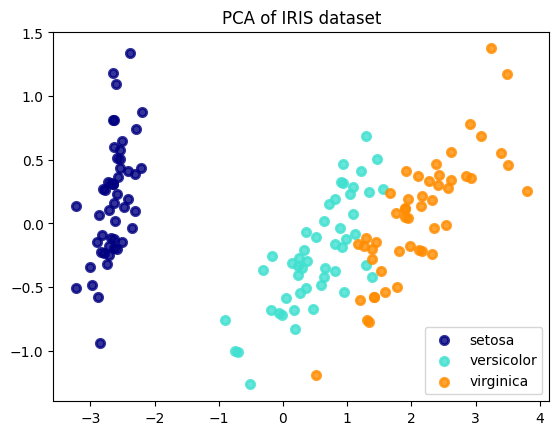

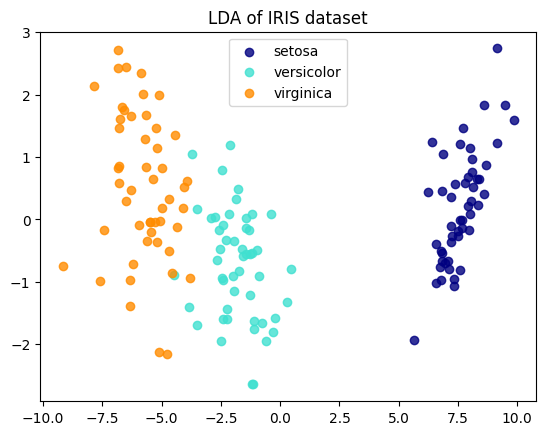

In [121]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

# Percentage of variance explained for each components
print(
    "explained variance ratio (first two components): %s"
    % str(pca.explained_variance_ratio_)
)

plt.figure()
colors = ["navy", "turquoise", "darkorange"]
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of IRIS dataset")

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_r2[y == i, 0], X_r2[y == i, 1], alpha=0.8, color=color, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("LDA of IRIS dataset")

plt.show()